While navigating through this file, please refer the library of functions rootineg24.py and library.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from library import truncate_to_x_decimals, steps_num
from rootinteg24 import simpson, midpoint,gauss_quad_6pt, rk4, crank_nicolson

QUESTION 1:
Solve exp(−x) − x = 0 using fixed-point method, accurate up to 4 places in
decimal.

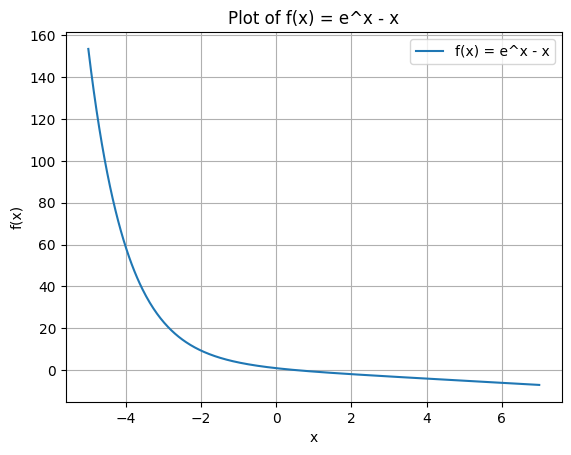

In [9]:
#Plotting the function to get an idea of the initial guess
def f(x):
   return (np.exp(-x)-x)

ex = np.linspace(-5, 7, 500)
y_values = f(ex)
# Plot
plt.plot(ex, y_values, label='f(x) = e^x - x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = e^x - x')
plt.grid(True)
plt.legend()
plt.show()


The solution lies between (0,2)

In [10]:
def g(x):
    return np.exp(-x)
x_0=np.random.uniform(0, 2)
while np.abs(x_0-g(x_0))>0.0001:
    x_0=g(x_0)
print(x_0)
print("With accuracy upto 4 decimal places, the solution is "+str(truncate_to_x_decimals(x_0,4)))

0.5671914685624466
With accuracy upto 4 decimal places, the solution is 0.5671


QUESTION 2 : 
Use Simpson’s rule and appropriate Gaussian quadrature to evaluate the following
integral accurate up to 6 places in decimal
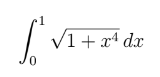

In [11]:
def f(x):
    return np.sqrt(x+1)
a=0
b=1
q2 = (simpson(f,a,b,100))
print("With accuracy upto 6 decimal places,with simpson, the solution is "+str(truncate_to_x_decimals(q2,6)))

With accuracy upto 6 decimal places,with simpson, the solution is 1.218951


In [12]:
q2g=(gauss_quad_6pt(f,a,b))
print("With accuracy upto 6 decimal places,with gaussian quadrature, the solution is "+str(truncate_to_x_decimals(q2g,6)))

With accuracy upto 6 decimal places,with gaussian quadrature, the solution is 1.218951


Solve the following ODE with RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01 
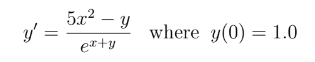

In [13]:
def y_prime(x,y):
   return (5*x**2-y)/(np.exp(x+y))

In [14]:
x0=0
y0=1
#let xn=1
xn=1
steps=[0.5,0.2,0.05,0.01]
for h in steps:
    N=steps_num(x0,xn,h)
    x,y=rk4(y_prime,x0,y0,xn,N)
   #to tabulate
    from tabulate import tabulate
    data = list(zip(x, y))
    print(f"For step size h = {h}:")
    print(tabulate(data, headers=["x", "y"], floatfmt=".4f"))
    print()



For step size h = 0.5:
     x       y
------  ------
0.0000  1.0000
0.5000  0.9132
1.0000  1.0719

For step size h = 0.2:
     x       y
------  ------
0.0000  1.0000
0.2000  0.9378
0.4000  0.9104
0.6000  0.9267
0.8000  0.9838
1.0000  1.0716

For step size h = 0.05:
     x       y
------  ------
0.0000  1.0000
0.0500  0.9821
0.1000  0.9656
0.1500  0.9507
0.2000  0.9378
0.2500  0.9271
0.3000  0.9189
0.3500  0.9133
0.4000  0.9104
0.4500  0.9104
0.5000  0.9131
0.5500  0.9185
0.6000  0.9267
0.6500  0.9375
0.7000  0.9507
0.7500  0.9662
0.8000  0.9838
0.8500  1.0034
0.9000  1.0246
0.9500  1.0474
1.0000  1.0716

For step size h = 0.01:
     x       y
------  ------
0.0000  1.0000
0.0100  0.9963
0.0200  0.9927
0.0300  0.9891
0.0400  0.9856
0.0500  0.9821
0.0600  0.9787
0.0700  0.9753
0.0800  0.9720
0.0900  0.9688
0.1000  0.9656
0.1100  0.9625
0.1200  0.9594
0.1300  0.9564
0.1400  0.9535
0.1500  0.9507
0.1600  0.9480
0.1700  0.9453
0.1800  0.9427
0.1900  0.9402
0.2000  0.9378
0.2100  0.9355
0.2

QUESTION 4
Solve the heat equation ut = 4uxx, using Crank-Nicolson and your choice of α,
subjected to the boundary conditions
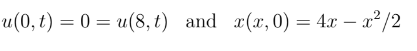
Since matrix inversion is not taught in class, you may use ready-made available
routines for the purpose. Comment on your choice of α and inversion algorithm.
Display the solution both in a table and a contour plot.

Solution Table:
+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
| 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    |
+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
| 0.03 | 1.88 | 1.85 | 1.83 | 1.81 | 1.79 | 1.77 | 1.76 | 1.74 | 1.73 | 1.71 | 1.7  | 1.69 | 1.6

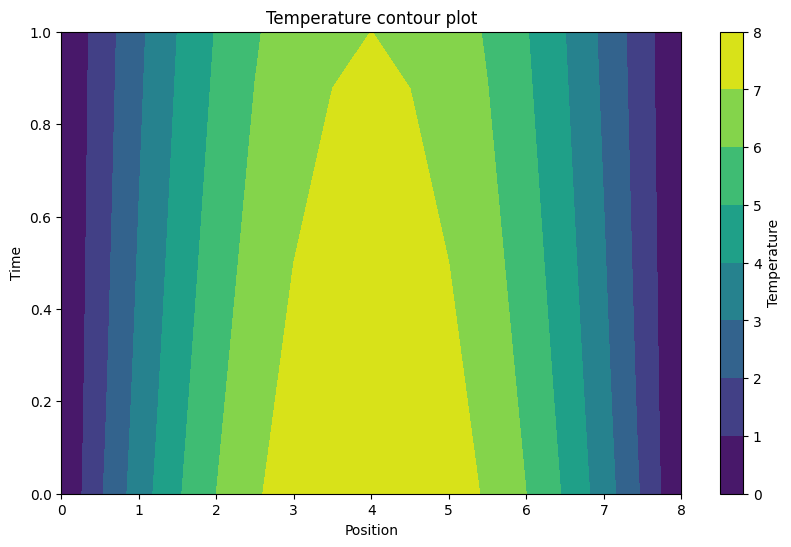

In [27]:
def ux0(x):
    return 4 * x - (x ** 2) / 2

# Parameters
length = 8.0 
time = 1.0  
dx=0.5
dy=0.025
#perform crank nicolson
x, t, u = crank_nicolson(ux0, length, time, dx,dy)
#table


table_data = [[f'{t_val:.2f}'] + [f'{val:.2f}' for val in row] for t_val, row in zip(t, u)]
table = tabulate(table_data, tablefmt='grid')
print("Solution Table:")
print(table)

# Plot the solution as a contour plot
X, T = np.meshgrid(x, t)

u_transposed = u.T

plt.figure(figsize=(10, 6))
plt.contourf(X, T, u_transposed, cmap='viridis')
plt.colorbar(label='Temperature')
plt.xlabel('Position')
plt.ylabel('Time')
plt.title('Temperature contour plot')
plt.show()

QUESTION 5:
Solve the Poisson’s equation uxx+uyy = xey

in a 6^2 grid with boundary conditions
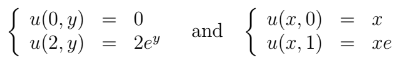
Display the solution both in a table and a 3-D plot.

Solution Table:
+-------+--------+--------+--------+--------+--------+--------+
|   Y/X |   0.00 |   0.40 |   0.80 |   1.20 |   1.60 |   2.00 |
+=======+========+========+========+========+========+========+
|   0   |      0 |   0.4  |   0.8  |   1.2  |   1.6  |   2    |
+-------+--------+--------+--------+--------+--------+--------+
|   0.2 |      0 |   0.13 |   0.29 |   0.47 |   1.25 |   2.44 |
+-------+--------+--------+--------+--------+--------+--------+
|   0.4 |      0 |   0.07 |   0.17 |   0.27 |   1.27 |   2.98 |
+-------+--------+--------+--------+--------+--------+--------+
|   0.6 |      0 |   0.06 |   0.15 |   0.24 |   1.47 |   3.64 |
+-------+--------+--------+--------+--------+--------+--------+
|   0.8 |      0 |   0.34 |   0.78 |   1.24 |   3.1  |   4.45 |
+-------+--------+--------+--------+--------+--------+--------+
|   1   |      0 |   1.09 |   2.17 |   3.26 |   4.35 |   5.44 |
+-------+--------+--------+--------+--------+--------+--------+


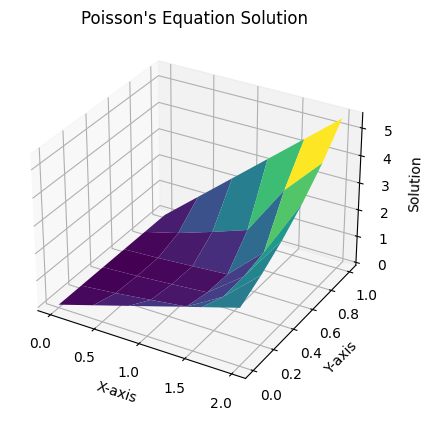

In [25]:

nx=6
ny=6
x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)
u = np.zeros((ny, nx))
u[0, :] = x
u[-1, :] = x * np.exp(1)
u[:, 0] = 0
u[:, -1] = 2 * np.exp(y)
X, Y = np.meshgrid(x, y)


for i in range(1, ny- 1):
    for j in range(1, nx - 1):
        u[i, j] = (u[i, j+1] + u[i, j-1] + u[i+1, j] + u[i-1, j] + dx**2 * x[j] * np.exp(y[i])) / 4

# Display the solution in a table
headers = ['Y/X'] + [f'{val:.2f}' for val in x]
table_data = [[f'{y_val:.2f}'] + [f'{val:.2f}' for val in row] for y_val, row in zip(y, u)]
table = tabulate(table_data, headers=headers, tablefmt='grid')
print("Solution Table:")
print(table)
# Display the solution in a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Solution')
ax.set_title("Poisson's Equation Solution")
plt.show()
